# Homework 2: Discovery of Frequent Itemsets and Association Rules
Authors: Tori Leatherman & Eva Engel \
Date: 21th November 2022

# Task
The task can be divided into two sub-problem: 
1. (A-Priori Algorithm) Find frequent itemsets with support at least *s_threshold*.
1. Generate association rules with confidence at least *c_threshold* from the itemsets found in the first step.

Our code reproduces the algorithm that was introduced by R. Agrawal and R. Srikant in [Fast Algorithms for Mining Association Rules](https://www.vldb.org/conf/1994/P487.PDF).


## Set up 
1. *pip install -r /path/to/requirements.txt*


### Import

In [1]:
from itertools import combinations
import matplotlib.pyplot as plt

from apriori import Apriori
from association_rule_finder import AssociationRuleFinder
from dataset_reader import read_transactions

### Data Set

In [2]:
dataset_file = 'T10I4D100K.dat'
transactions = read_transactions(dataset_file)
print(f"Data set contains {len(transactions)} transactions and {len(set.union(*transactions))} unique items.")

Data set is load.
Data set contains 100000 transactions and 870 unique items.


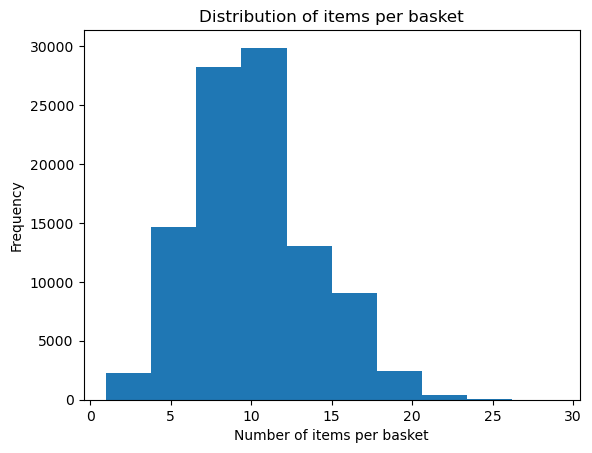

In [3]:
# Distribution of items per basket

nof_items= [len(transaction) for transaction in transactions]
plt.hist(nof_items)
plt.title('Distribution of items per basket')
plt.xlabel('Number of items per basket')
plt.ylabel('Frequency')
plt.show()

# Frequent items (A-Priori Algorithm)

TODO: theory candidate approach, assumption: 

input: transactions 
s_threshold

In [5]:
finder = Apriori(transactions, s_threshold=0.9)
k_frequent_items = finder.apriori()

The support threshold is 2695.0000000000005
1st Pass: Frequent items = 87
2th Pass: Candidates = 3741
The average support is 144.32
The support threshold is 303.0
Frequent items = 372
 -------------------------------------
3th Pass: Candidates = 3346
The average support is 34.43
The support threshold is 41.0
Frequent items = 332
 -------------------------------------
4th Pass: Candidates = 1138
The average support is 20.00
The support threshold is 24.0
Frequent items = 102
 -------------------------------------
5th Pass: Candidates = 118
The average support is 35.94
The support threshold is 190.3
Frequent items = 11
 -------------------------------------
6th Pass: Candidates = 2
The average support is 198.50
The support threshold is 210.9
Frequent items = 1
 -------------------------------------


### Get most frequent item sets with largest number of items

In [6]:
max_k = len(list(k_frequent_items.keys())[-1])

In [7]:
max_k_itemset = {k: v for k,v in k_frequent_items.items() if len(k) == max_k}
max_k_itemset

{frozenset({8, 71, 75, 438, 684, 766}): 214}

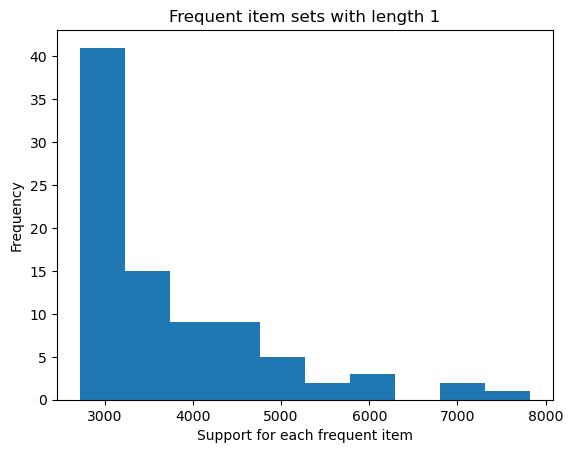

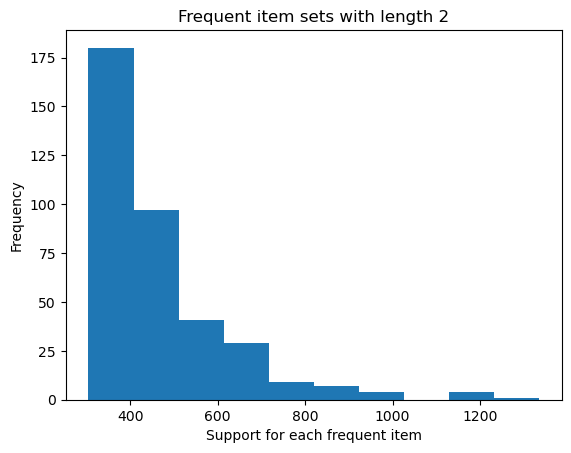

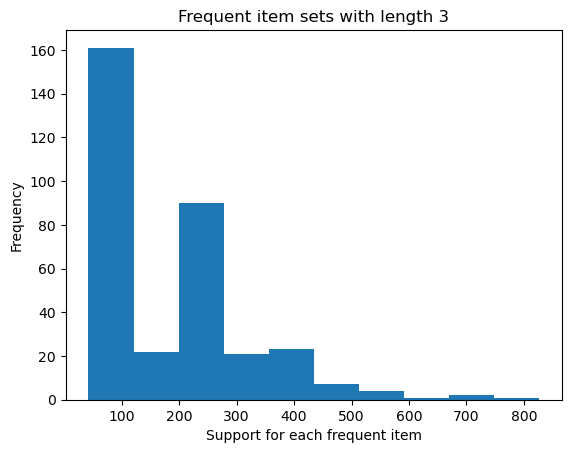

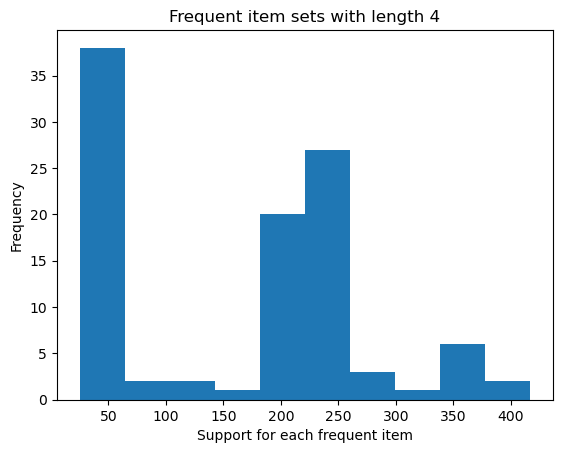

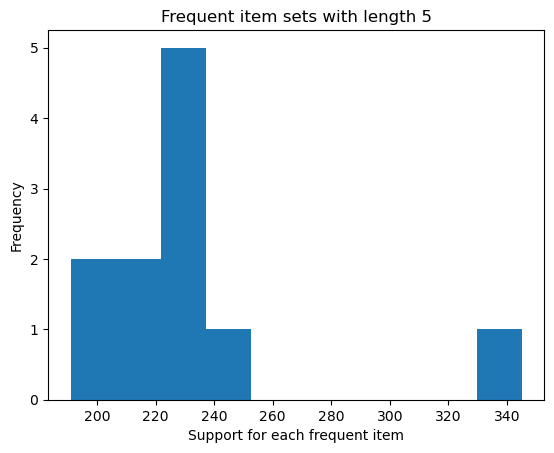

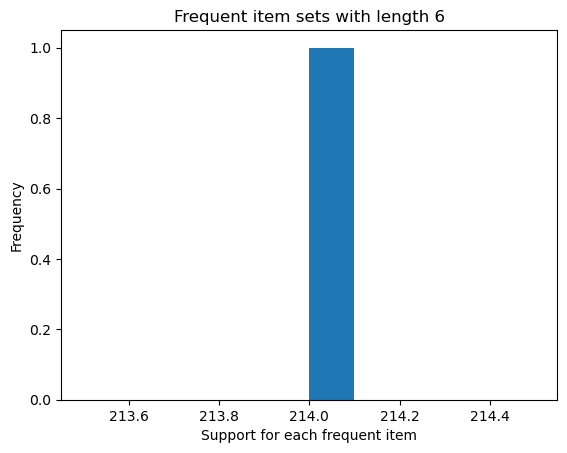

In [8]:
for k in range(1,max_k+1):

    supports = [val for key,val in k_frequent_items.items() if len(key) == k]
    plt.hist(supports)
    plt.xlabel('Support for each frequent item')
    plt.ylabel('Frequency')
    plt.title(f'Frequent item sets with length {k}')
    plt.show()

# Association rules

TODO;add theory, computation support confidence
Confidence of a rule  X -> Y

In [9]:
rule_finder = AssociationRuleFinder()
rules = rule_finder.find_rules(k_frequent_items)

In [10]:
sorted(((v,k) for k,v in rules.items()), reverse=True)

[(0.9879032258064516, (frozenset({145, 283, 489}), frozenset({39}))),
 (0.9867256637168141, (frozenset({8, 71, 75, 766}), frozenset({684}))),
 (0.9866071428571429, (frozenset({8, 75, 438, 766}), frozenset({684}))),
 (0.9861751152073732, (frozenset({8, 71, 75, 438, 766}), frozenset({684}))),
 (0.9832635983263598, (frozenset({8, 75, 766}), frozenset({684}))),
 (0.9829787234042553, (frozenset({72, 529, 541, 947}), frozenset({937}))),
 (0.9829787234042553, (frozenset({529, 541, 937, 947}), frozenset({72}))),
 (0.98, (frozenset({39, 145, 489}), frozenset({283}))),
 (0.98, (frozenset({39, 283, 489}), frozenset({145}))),
 (0.9788135593220338, (frozenset({72, 541, 937, 947}), frozenset({529}))),
 (0.9780701754385965, (frozenset({8, 71, 438, 766}), frozenset({684}))),
 (0.9779735682819384, (frozenset({8, 71, 75, 438}), frozenset({684}))),
 (0.9773371104815864, (frozenset({401, 581, 631, 758}), frozenset({509}))),
 (0.9757085020242915, (frozenset({8, 75, 438}), frozenset({684}))),
 (0.9754098360

# Experiments

## Monotonicity of support
The following shows that the support of a set is at least as large as the support of its subsets. We take the largest and most frequent item set and show that its subsets have a greater support. 

In [11]:
max_k_support= max(max_k_itemset, key=lambda k: max_k_itemset[k])
print(max_k_support, max_k_itemset[max_k_support])


frozenset({71, 8, 75, 684, 438, 766}) 214


In [12]:
for k_length in range(1, len(max_k_support)):
    for subset in [frozenset(combination) for combination in combinations(max_k_support, k_length)]:
        print(subset, k_frequent_items.get(subset))
    print('----------------------------------')
print(max_k_support, max_k_itemset[max_k_support])

frozenset({71}) 3507
frozenset({8}) 3090
frozenset({75}) 3151
frozenset({684}) 5408
frozenset({438}) 4511
frozenset({766}) 6265
----------------------------------
frozenset({8, 71}) 313
frozenset({75, 71}) 309
frozenset({684, 71}) 449
frozenset({438, 71}) 359
frozenset({766, 71}) 673
frozenset({8, 75}) 317
frozenset({8, 684}) 498
frozenset({8, 438}) 331
frozenset({8, 766}) 399
frozenset({75, 684}) 797
frozenset({75, 438}) 772
frozenset({75, 766}) 373
frozenset({684, 438}) 825
frozenset({684, 766}) 613
frozenset({438, 766}) 431
----------------------------------
frozenset({8, 75, 71}) 239
frozenset({8, 684, 71}) 243
frozenset({8, 438, 71}) 238
frozenset({8, 766, 71}) 248
frozenset({75, 684, 71}) 257
frozenset({75, 438, 71}) 252
frozenset({75, 766, 71}) 244
frozenset({684, 438, 71}) 263
frozenset({684, 766, 71}) 259
frozenset({766, 438, 71}) 255
frozenset({8, 75, 684}) 264
frozenset({8, 75, 438}) 247
frozenset({8, 75, 766}) 239
frozenset({8, 684, 438}) 255
frozenset({8, 684, 766}) 259
fr